<a href="https://colab.research.google.com/github/sanu1230/Personal_Projects/blob/master/Finance_Final_closing_price_prediction_of_Uniqlo_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Closing price of Uniqlo Stock





## Business Requirement

- To Understand what will be the estimated stock price of the company in the next 7 days

## Importing the packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Uniqlo_2012-2016_Train.csv")          # Reading the training data

In [5]:
df.head()                                                                                 # Checking the first 5 rows of the data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


We just need two features: Date and Close

In [6]:
cols=['Date','Close']
stocks_df=df[cols]                                                                            # new_df contains only the required columns
stocks_df.head()

,Date,Close
0,2016-12-30,41830
1,2016-12-29,42660
2,2016-12-28,43270
3,2016-12-27,43620
4,2016-12-26,43340


## Exploring the data

In [7]:
stocks_df.info()                                                                             # Checking the missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1226 non-null   object
 1   Close   1226 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


**The Date column is an object. Let's convert it to datetime.**

In [8]:
stocks_df['Date']=pd.to_datetime(stocks_df['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
# Lets recheck
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1226 non-null   datetime64[ns]
 1   Close   1226 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.3 KB


Setting the date column as index

In [10]:
stocks_df = stocks_df.set_index("Date")

In [13]:
stocks_df

,Close
Date,
2016-12-30,41830
2016-12-29,42660
2016-12-28,43270
2016-12-27,43620
2016-12-26,43340
...,...
2012-01-11,14590
2012-01-10,14390
2012-01-06,13850


Our data starts from 4th January 2012 to 30th December 2016

In [14]:
stocks_df.shape

(1226, 1)

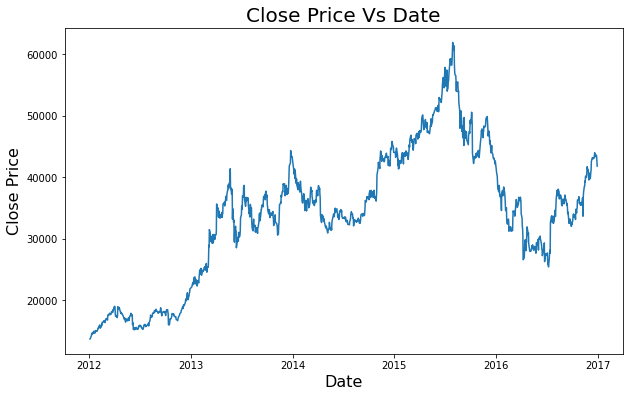

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=stocks_df, x=stocks_df.index, y='Close')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price", fontsize=16)
plt.title("Close Price Vs Date", fontsize=20)
plt.show()

## Importing more packages for prediction

In [22]:
from keras.models import Sequential                   # Sequential model
from keras.layers import Dense                        # For fully connected layers
from keras.layers import LSTM                         # For LSTM layers
from sklearn.preprocessing import MinMaxScaler        # Scaling the data
min_max_scaler = MinMaxScaler()

In [23]:
len(stocks_df)

1226

Checking for null values

In [24]:
stocks_df.isnull().sum()                                 # There are no null values in the dataframe

Close    0
dtype: int64

## Train Test Split
Lets make prediction for 30 days

In [28]:
prediction_days = -30
ts_train= stocks_df[:prediction_days]       # Remove 30 days from the end for Training data
ts_test= stocks_df[prediction_days:]        # Last 30 days values for test

In [29]:
ts_train.shape                                             # Checking the number of rows in train data

(1196, 1)

In [30]:
ts_test.shape                                              # Checking the number of rows in test data

(30, 1)

In [31]:
ts_test.tail()

,Close
Date,
2012-01-11,14590
2012-01-10,14390
2012-01-06,13850
2012-01-05,13800
2012-01-04,13720


In [32]:
# Scaling the train data

training_set = ts_train.values
training_set = min_max_scaler.fit_transform(training_set)

## Splitting into X and y
**X is our inputs which is the training data.  <br>
y is the output, which is training data shifted by 1.**   <br>

For a given day, we want to predict the stock value for the next day.

In [33]:
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]

In [34]:
x_train[:5]                                                  # Checking the first 5 rows of the scaled training data

array([[0.56968529],
       [0.58745451],
       [0.60051381],
       [0.60800685],
       [0.60201242]])

In [35]:
y_train[:5]                                                  # Checking the first 5 rows of the scaled test data

array([[0.58745451],
       [0.60051381],
       [0.60800685],
       [0.60201242],
       [0.60500963]])

In [36]:
len(x_train)                                                 # We should have same number of records in x_train and y_train

1195

In [37]:
len(y_train)

1195

## Model Building
- Neural Network

In [43]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))          # We need to reshape the data before it is passed to the model

In [39]:
x_train.shape

(1195, 1, 1)

In [40]:
print(x_train)

[[[0.56968529]]

 [[0.58745451]]

 [[0.60051381]]

 ...

 [[0.02633269]]

 [[0.02633269]]

 [[0.0261186 ]]]


In [58]:
num_units = 32
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

In [59]:
# Training the data from 4-01-2012 to 16-11-2016

regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/50
239/239 [==============================] - 1s 3ms/step - loss: 0.0462
Epoch 2/50
239/239 [==============================] - 1s 3ms/step - loss: 0.0300
Epoch 3/50
239/239 [==============================] - 1s 3ms/step - loss: 0.0171
Epoch 4/50
239/239 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 5/50
239/239 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 6/50
239/239 [==============================] - 1s 3ms/step - loss: 9.4778e-04
Epoch 7/50
239/239 [==============================] - 1s 3ms/step - loss: 4.3444e-04
Epoch 8/50
239/239 [==============================] - 1s 3ms/step - loss: 3.5921e-04
Epoch 9/50
239/239 [==============================] - 1s 3ms/step - loss: 3.4091e-04
Epoch 10/50
239/239 [==============================] - 1s 3ms/step - loss: 3.3945e-04
Epoch 11/50
239/239 [==============================] - 1s 3ms/step - loss: 3.4604e-04
Epoch 12/50
239/239 [==============================] - 1s 3ms/step - loss: 3.5877e-

## Prediction on ts_test

In [79]:
# We are going to make prediction from 17-11-2016 to 30-12-2016

# Preprocess the test data

test_set = ts_test.values

inputs = np.reshape(test_set, (len(test_set), 1))                        # Reshape before passing in the input
inputs = min_max_scaler.transform(inputs)                                # Scaling the data
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)                              # Make predictions on the test data
predicted_price = min_max_scaler.inverse_transform(predicted_price)      # Inverse transform the predicted price

In [94]:
# This is the close price of stocks for last 30 days

# predicted_price             
test_set = pd.DataFrame(test_set)
test_set.columns = ['Close']  
test_set['Close'] = test_set['Close'].astype('float64')                         

In [95]:
predicted_price = pd.DataFrame(predicted_price)
predicted_price.columns = ['Close']
predicted_price['Close'] = predicted_price['Close'].astype('float64')
predicted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [96]:
# Lets have a look at the error values
error=predicted_price-test_set                
# Calculate the error

error

,Close
0,137.887695
1,138.240234
2,138.331055
3,138.546875
4,138.240234
5,137.968750
6,138.346680
7,138.135742
8,138.587891
9,138.546875


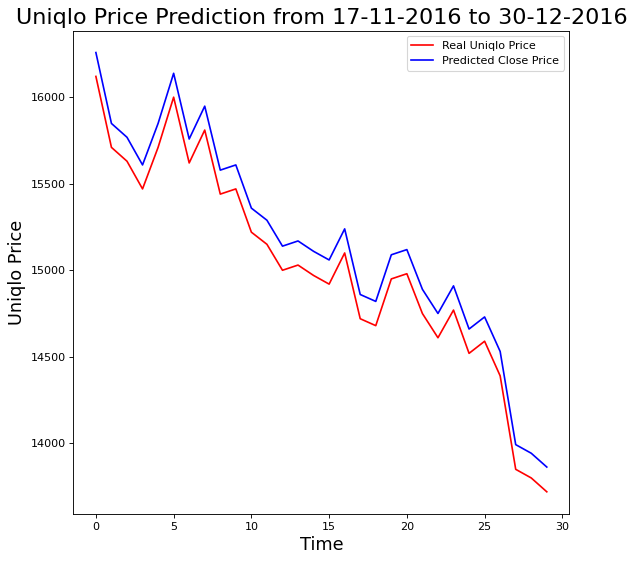

In [105]:
# Plot the Actual price and the predicted price

plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set['Close'], color='red', label='Real Uniqlo Price')                      # Actual Price
plt.plot(predicted_price['Close'], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('Uniqlo Price Prediction from 17-11-2016 to 30-12-2016', fontsize = 20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Uniqlo Price', fontsize = 16)
plt.legend(loc = 'best')
plt.show()

## Prediction with test data

In [103]:
test_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Uniqlo_2017_Test.csv")              # Loading the test data

In [106]:
test_data.shape

(7, 7)

In [107]:
test_data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


This has data for 7 days from 4-01-2017 to 13-1-2017 

#### Extracting all the rows and 4th column

In [108]:
test_data1=test_data.iloc[:,4]                                                         # Extracting the close price
test_data1

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

#### We need to perform feature engineering on the test price before we can make predictions from the model.

In [109]:
test_data1=np.array(test_data1)

In [110]:
test_data1

array([38430, 38010, 38560, 38690, 39720, 42590, 43290])

In [111]:
test_data1 =test_data1.reshape(-1,1)                               # Reshape the data before you feed into the model

In [112]:
test_data1

array([[38430],
       [38010],
       [38560],
       [38690],
       [39720],
       [42590],
       [43290]])

In [113]:
test_input=min_max_scaler.transform(test_data1)                    # Scale the data

In [114]:
test_input

array([[0.49689574],
       [0.48790409],
       [0.49967887],
       [0.502462  ],
       [0.52451295],
       [0.5859559 ],
       [0.60094198]])

In [115]:
((38430-35349.7386336)/5280)

0.5833828345454549

In [116]:
test_input.shape

(7, 1)

In [117]:
test_input=np.reshape(test_input, (len(test_input), 1, 1))

In [118]:
test_prediction=regressor.predict(test_input)                          # Make predictions for the test data

In [119]:
test_prediction=min_max_scaler.inverse_transform(test_prediction)      # Inverse transform the predictions

In [120]:
test_prediction

array([[38664.34 ],
       [38244.13 ],
       [38794.363],
       [38924.367],
       [39953.65 ],
       [42813.883],
       [43509.56 ]], dtype=float32)

In [121]:
test_data.iloc[:,4].values

array([38430, 38010, 38560, 38690, 39720, 42590, 43290])

In [122]:
error1 = test_prediction - test_data.iloc[:,4].values
error1

array([[  234.33984375,   654.33984375,   104.33984375,   -25.66015625,
        -1055.66015625, -3925.66015625, -4625.66015625],
       [ -185.87109375,   234.12890625,  -315.87109375,  -445.87109375,
        -1475.87109375, -4345.87109375, -5045.87109375],
       [  364.36328125,   784.36328125,   234.36328125,   104.36328125,
         -925.63671875, -3795.63671875, -4495.63671875],
       [  494.3671875 ,   914.3671875 ,   364.3671875 ,   234.3671875 ,
         -795.6328125 , -3665.6328125 , -4365.6328125 ],
       [ 1523.6484375 ,  1943.6484375 ,  1393.6484375 ,  1263.6484375 ,
          233.6484375 , -2636.3515625 , -3336.3515625 ],
       [ 4383.8828125 ,  4803.8828125 ,  4253.8828125 ,  4123.8828125 ,
         3093.8828125 ,   223.8828125 ,  -476.1171875 ],
       [ 5079.55859375,  5499.55859375,  4949.55859375,  4819.55859375,
         3789.55859375,   919.55859375,   219.55859375]])

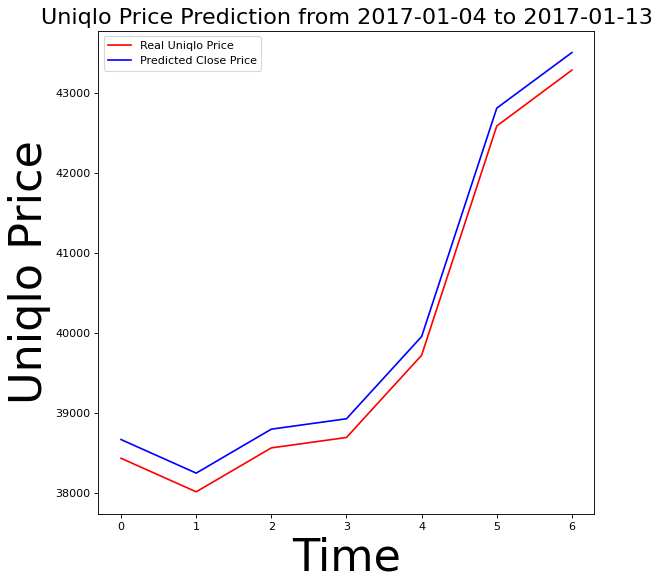

In [123]:
# Plot the Actual price and the predicted price for test data

plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_data.iloc[:, 4], color='red', label='Real Uniqlo Price')                      # Actual Price
plt.plot(test_prediction[:, 0], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('Uniqlo Price Prediction from 2017-01-04 to 2017-01-13', fontsize = 20)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Uniqlo Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()